<a href="https://colab.research.google.com/github/Boris2232/Machine-Learning-Project/blob/main/Analyzing%20differences%20in%20datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

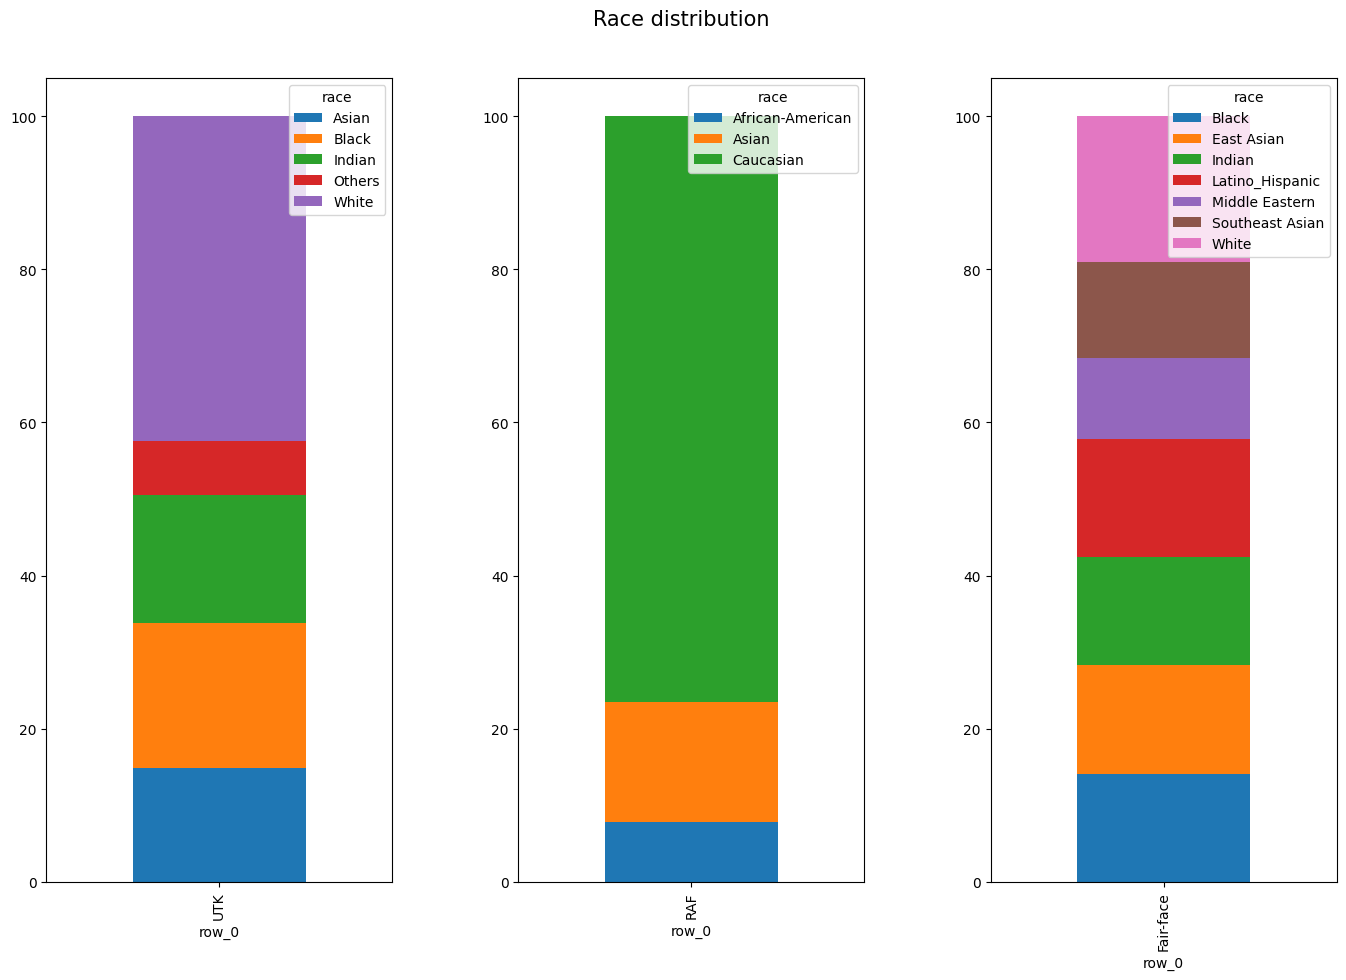

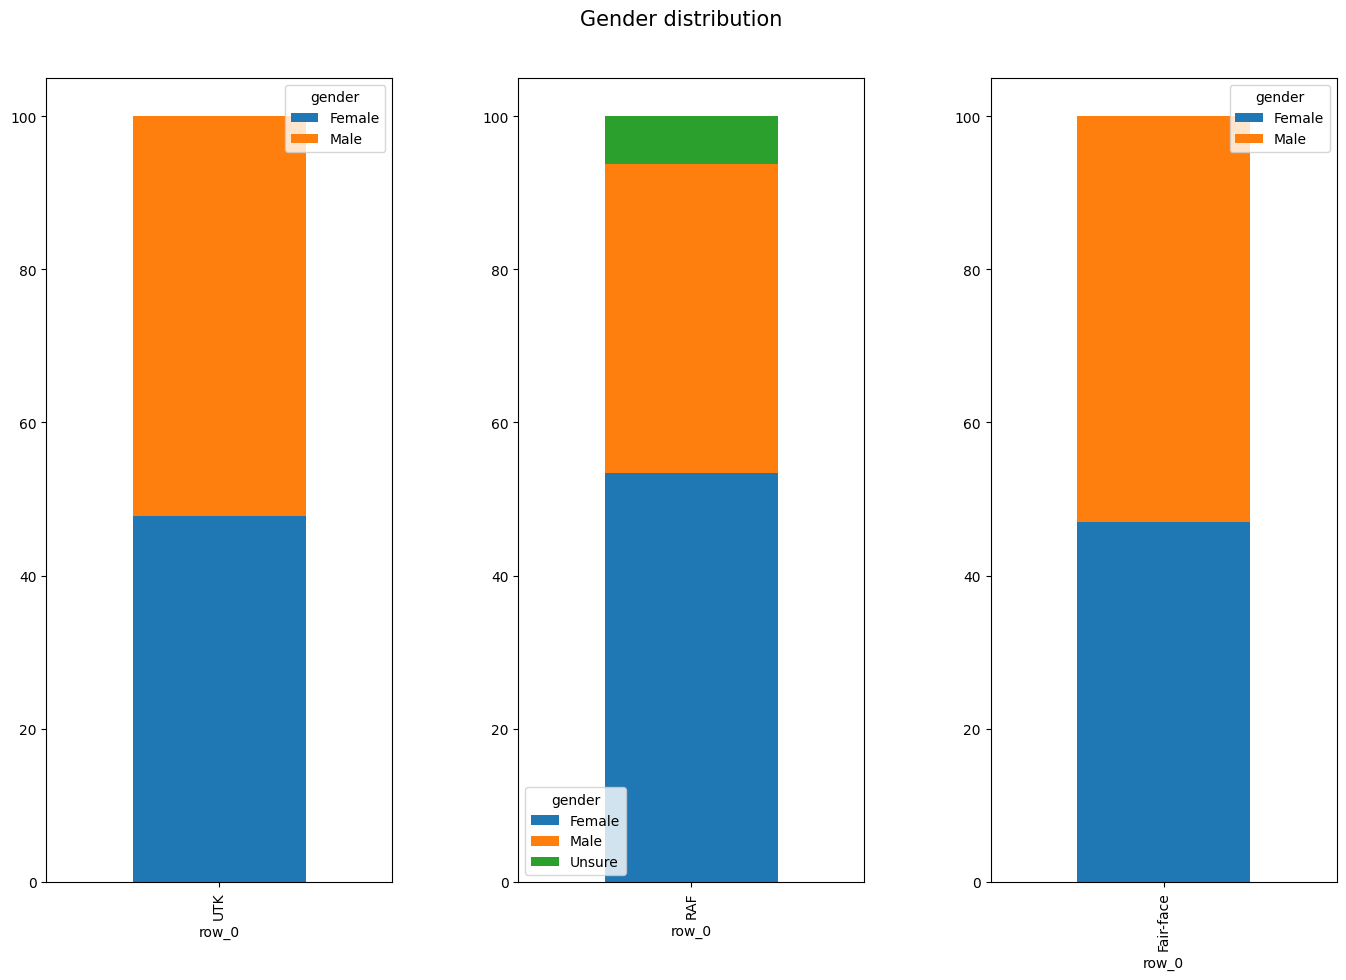

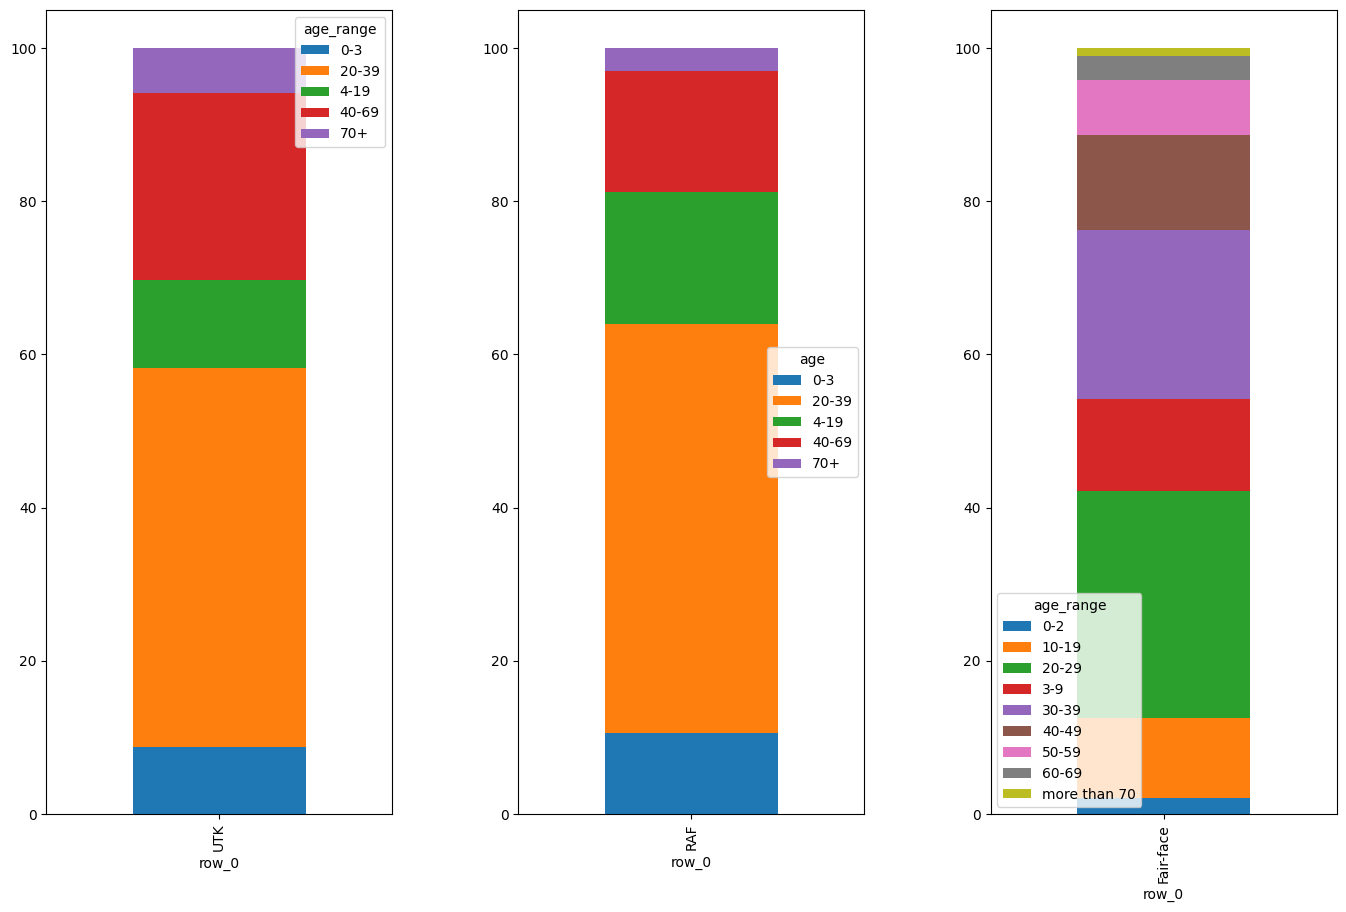

In [23]:
# creating a figure
fig, axes = plt.subplots(1, 3, figsize=(15, 10))
# colors for bar charts
colors = ['cadetblue', 'violet', 'blue', 'green', 'yellow', 'cyan', 'magenta', 'maroon', 'coral']
fig.tight_layout(pad=6.0)
fig.suptitle("Race distribution", fontsize=15)
plt.legend(loc='upper left')
df = pd.read_csv('UTK_faces.csv', delimiter=';')
pd.set_option('display.max_columns', None)
# Transforming UTK dataset


# using np.where function to set a condition
# in UTL all ages are given in numbers => we need to convert them to age ranges
df['age_range'] = np.where(
    (df['age'] >= 0) & (df['age'] <= 3), '0-3', df['age_range'])
df['age_range'] = np.where(
    (df['age'] >= 4) & (df['age'] <= 19), '4-19', df['age_range'])
df['age_range'] = np.where(
    (df['age'] >= 20) & (df['age'] <= 39), '20-39', df['age_range'])
df['age_range'] = np.where(
    (df['age'] >= 40) & (df['age'] <= 69), '40-69', df['age_range'])
df['age_range'] = np.where(
    (df['age'] >= 70), '70+', df['age_range'])
df = pd.DataFrame(df)
# replacing numerical values with string for visual convenience
new = df['gender'].replace([0.0, 1.0], ['Male', 'Female'])
df['gender'] = new
new = df['race'].replace([i for i in range(5)], ['White', 'Black', 'Asian', 'Indian', 'Others'])
df['race'] = new
# UTK dataset is ready
#
#
#
# preparing RAF-DB
df_raf = pd.read_csv('RAF_DB.csv', delimiter=';')
# Transforming RAF-DB dataset
df_raf = pd.DataFrame(df_raf)
new = df_raf['race'].replace([0, 1, 2], ['Caucasian', 'African-American', 'Asian'])
df_raf['race'] = new
new = df_raf['gender'].replace([0, 1, 2], ['Male', 'Female', 'Unsure'])
df_raf['gender'] = new

# preparing fair-face
df_fair = pd.read_csv('Fair-Face.csv', delimiter=';')
pd.set_option('display.max_columns', None)
# Transforming fair-face dataset
df_fair = pd.DataFrame(df_fair)
new = df_fair['race'].replace([0, 1, 2], ['Caucasian', 'African-American', 'Asian'])
df_fair['race'] = new
#
#
#
#
#
# np.apply => function to conduct mathematical operations
# .apply(lambda r: r / r.sum() * 100, axis=1) => converts numbers to percents (more human-friendly)
new_plot = pd.crosstab(index='UTK', columns=df['race']).apply(lambda r: r / r.sum() * 100, axis=1)
new_plot.plot(kind='bar',
              stacked=True, ax=axes[0])
#
#
#
#
#
RAF_plot = pd.crosstab(index='RAF', columns=df_raf['race']).apply(lambda r: r / r.sum() * 100, axis=1)
RAF_plot.plot(kind='bar',
              stacked=True, ax=axes[1])
#
#
#
#
fair_plot = pd.crosstab(index='Fair-face', columns=df_fair['race']).apply(lambda r: r / r.sum() * 100, axis=1)
fair_plot.plot(kind='bar',
               stacked=True, ax=axes[2])
#
#
#
#
#
plt.show()
#
#
#
fig, axes = plt.subplots(1, 3, figsize=(15, 10))
colors = ['cadetblue', 'violet', 'blue', 'green', 'yellow', 'cyan', 'magenta', 'maroon', 'coral']
fig.tight_layout(pad=6.0)
fig.suptitle("Gender distribution", fontsize=15)
#
#
new_plot = pd.crosstab(index='UTK', columns=df['gender']).apply(lambda r: r / r.sum() * 100, axis=1)
new_plot.plot(kind='bar',
              stacked=True, ax=axes[0])
#
#
#
#
#
RAF_plot = pd.crosstab(index='RAF', columns=df_raf['gender']).apply(lambda r: r / r.sum() * 100, axis=1)
RAF_plot.plot(kind='bar',stacked=True, ax=axes[1])

fair_plot = pd.crosstab(index='Fair-face', columns=df_fair['gender']).apply(lambda r: r / r.sum() * 100, axis=1)
fair_plot.plot(kind='bar',stacked=True, ax=axes[2])
#
#
#
#
fig, axes = plt.subplots(1, 3, figsize=(15, 10))
fig.tight_layout(pad=6.0)
new_plot = pd.crosstab(index='UTK', columns=df['age_range']).apply(lambda r: r / r.sum() * 100, axis=1)
new_plot.plot(kind='bar',stacked=True, ax=axes[0])
#
#
#
#
RAF_plot = pd.crosstab(index='RAF', columns=df_raf['age']).apply(lambda r: r / r.sum() * 100, axis=1)
RAF_plot.plot(kind='bar', stacked=True, ax=axes[1])
#
#
fair_plot = pd.crosstab(index='Fair-face', columns=df_fair['age_range']).apply(lambda r: r / r.sum() * 100, axis=1)
fair_plot.plot(kind='bar',stacked=True, ax=axes[2])
#
#
#
plt.show()